In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [4]:
income_data=pd.read_csv('income.csv', delimiter= ", ", header=0)
income_data.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
26151,54,Local-gov,173050,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,40,United-States,>50K
23180,33,Private,159574,7th-8th,4,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,45,United-States,<=50K
31588,28,Private,142712,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,50,United-States,>50K
20178,22,Private,283499,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0,0,35,United-States,<=50K
3616,26,Private,189590,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States,<=50K


### Clean Data

In [13]:
income_data["sex"] = income_data["sex"].apply(lambda row: 0 if row == "Male" else 1)
income_data["country-int"] = income_data["native-country"].apply(lambda row: 0 if row == "United-States" else 1)
income_data["income"] = income_data["income"].apply(lambda row: 0 if row == "<=50K" else 1)
income_data.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,country-int
20154,34,Private,321787,Some-college,10,Never-married,Adm-clerical,Own-child,White,0,0,0,40,United-States,0,0
12605,56,Private,212864,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,0,0,0,40,United-States,1,0
17900,52,Private,31460,HS-grad,9,Divorced,Other-service,Not-in-family,White,0,0,0,38,United-States,0,0
10206,19,Private,466458,Some-college,10,Never-married,Adm-clerical,Own-child,White,1,0,0,20,United-States,0,0
10176,37,Private,242713,12th,8,Separated,Priv-house-serv,Unmarried,Black,1,0,0,40,United-States,0,0


### use correlation matrix to identify features that highly correlate with income

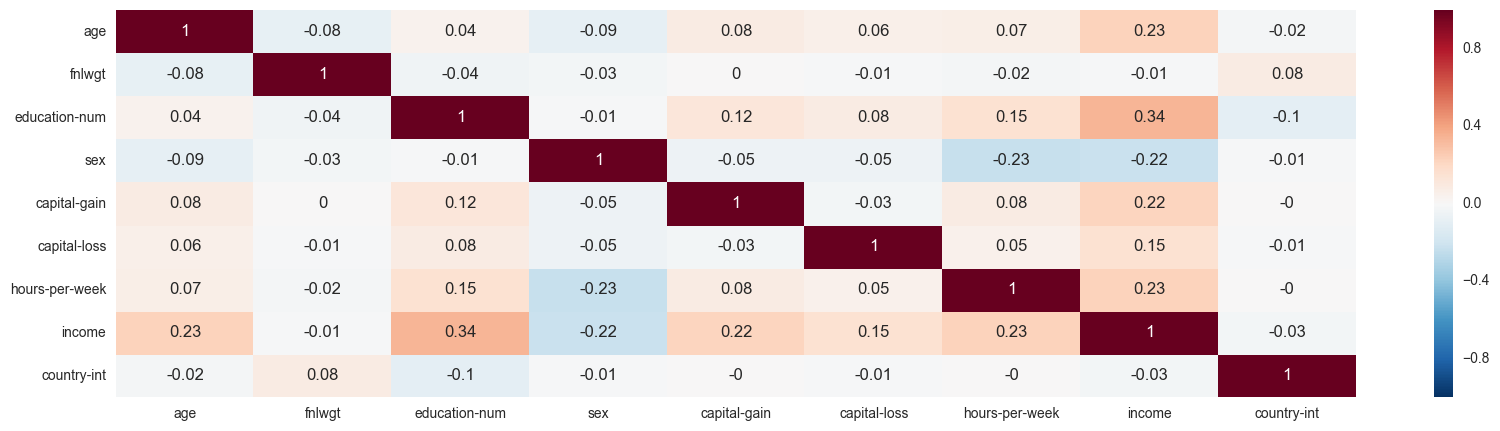

In [14]:
plt.figure(figsize=(20,5))
correlation_matrix=income_data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [15]:
features =income_data[["age", "education-num","sex", "capital-gain", "capital-loss", "hours-per-week"]]
target=income_data[['income']]

In [16]:
train_data, test_data, train_labels, test_labels = train_test_split(features, target, random_state=1)

### Using Radom Forrest Classifier

In [20]:
forest= RandomForestClassifier(random_state=1)
forest.fit(train_data,train_labels)
s=forest.score(test_data,test_labels).round(2)
print('Random Forrest Accuracy is {}'.format(s))

Random Forrest Accuracy is 0.83
